In [1]:
# result comparison between deployments, encounters

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
result_path  = '/home/ys587/__Data/__whistle/__whistle_30_species/__fit_result_species/__final'

In [4]:
species_dict = {'BD': 0, 'CD': 1, 'STR': 2, 'SPT': 3, 'SPIN': 4, 'PLT': 5, 'RT': 6,  'FKW': 7}
num_species = len(species_dict)
species_list = list(species_dict.keys())
species_id = list(species_dict.values())

# Deployments

In [5]:
# deployment: e.g. STAR2006_test_results.npz
deployment_list = ['STAR2000', 'STAR2003', 'STAR2006', 'HICEAS2002', 'PICEAS2005']

# for ii in range(len(deployment_list)):
label_test_all  = []
label_pred_all = []
for ee in deployment_list:
    label_temp = np.load(os.path.join(result_path, '20210520_155025_deployment', ee+'_test_results.npz'))
    label_test_all.append(label_temp['label_test'])
    label_pred_all.append(label_temp['label_pred'])
label_pred_all = np.concatenate(label_pred_all)
label_test_all = np.concatenate(label_test_all)

## Confusion matrix

In [6]:
np.set_printoptions(linewidth=200, precision=2, suppress=True)

In [7]:
print("Confusion matrix:")
# cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[ 157  611  272  284  284  381  116   55]
 [ 494 1681  998  238   20  852  231  201]
 [ 400  415  898  390   74  315   68  131]
 [ 357  419  382  701  103  298   55   77]
 [ 226  188  140  192  173  111   56   37]
 [ 236  206   52   50   22 1116   77  405]
 [  78  140   32   22   21  153  510  448]
 [  38  183   72   21   12  812  412 1875]]

[[0.07 0.28 0.13 0.13 0.13 0.18 0.05 0.03]
 [0.1  0.36 0.21 0.05 0.   0.18 0.05 0.04]
 [0.15 0.15 0.33 0.14 0.03 0.12 0.03 0.05]
 [0.15 0.18 0.16 0.29 0.04 0.12 0.02 0.03]
 [0.2  0.17 0.12 0.17 0.15 0.1  0.05 0.03]
 [0.11 0.1  0.02 0.02 0.01 0.52 0.04 0.19]
 [0.06 0.1  0.02 0.02 0.01 0.11 0.36 0.32]
 [0.01 0.05 0.02 0.01 0.   0.24 0.12 0.55]]


In [8]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

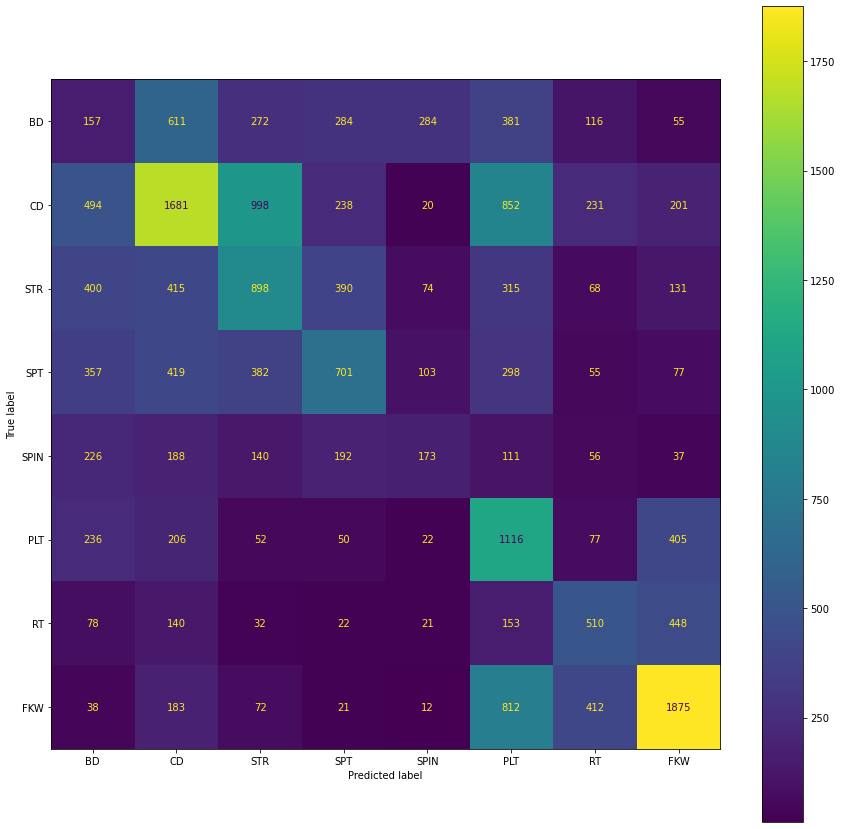

In [9]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


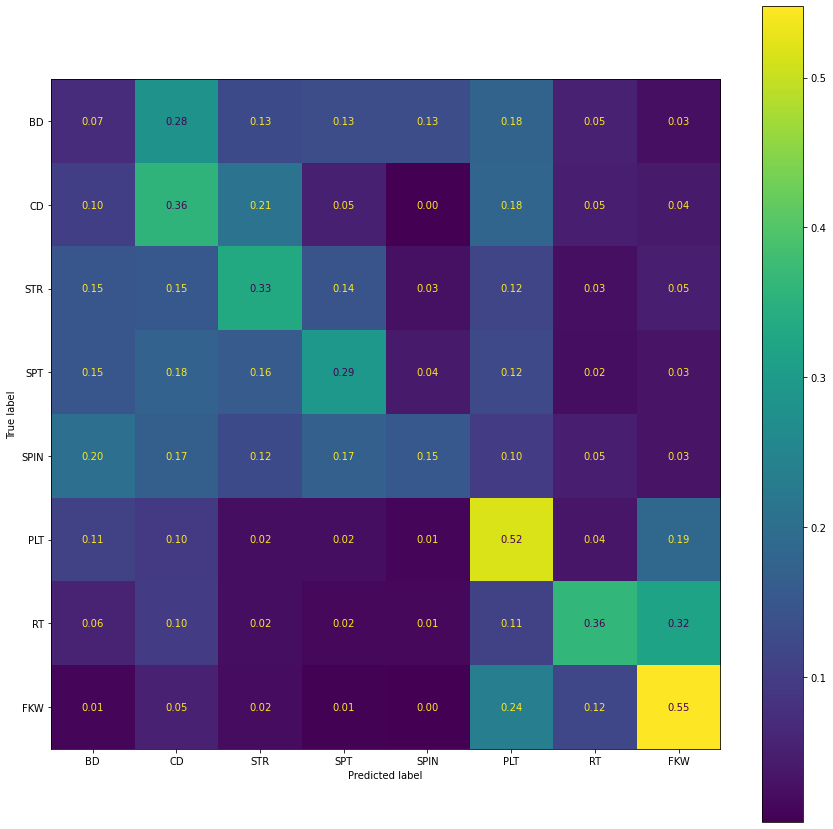

In [10]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)

# Enounter

In [11]:
# enounter: e.g. fold0_test_results.npz, 
encounter_list = ['fold0', 'fold1', 'fold2', 'fold3', 'fold4']
# result_encounter = np.load(os.path.join(result_path, '20210520_104352_encounter'))

# for ii in range(len(encounter_list)):
label_test_all  = []
label_pred_all = []
for ee in encounter_list:
    label_temp = np.load(os.path.join(result_path, '20210520_104352_encounter', ee+'_test_results.npz'))
    label_test_all.append(label_temp['label_test'])
    label_pred_all.append(label_temp['label_pred'])
label_pred_all = np.concatenate(label_pred_all)
label_test_all = np.concatenate(label_test_all)

## Confusion matrix

In [12]:
np.set_printoptions(linewidth=200, precision=2, suppress=True)

In [13]:
print("Confusion matrix:")
# cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[1002  218  307  166  209  135   65   58]
 [  64 3364  701  261   73  115   58   79]
 [ 166  802 1130  166  131  146   64   86]
 [ 351 1002  363  364  131  134   23   24]
 [ 255  335  148   76  186   13   84   26]
 [ 150   95  116   29   14 1429   71  260]
 [  69   46   34    7   53   73  753  369]
 [  75  154   54   10   24  541  592 1975]]

[[0.46 0.1  0.14 0.08 0.1  0.06 0.03 0.03]
 [0.01 0.71 0.15 0.06 0.02 0.02 0.01 0.02]
 [0.06 0.3  0.42 0.06 0.05 0.05 0.02 0.03]
 [0.15 0.42 0.15 0.15 0.05 0.06 0.01 0.01]
 [0.23 0.3  0.13 0.07 0.17 0.01 0.07 0.02]
 [0.07 0.04 0.05 0.01 0.01 0.66 0.03 0.12]
 [0.05 0.03 0.02 0.   0.04 0.05 0.54 0.26]
 [0.02 0.04 0.02 0.   0.01 0.16 0.17 0.58]]


In [14]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

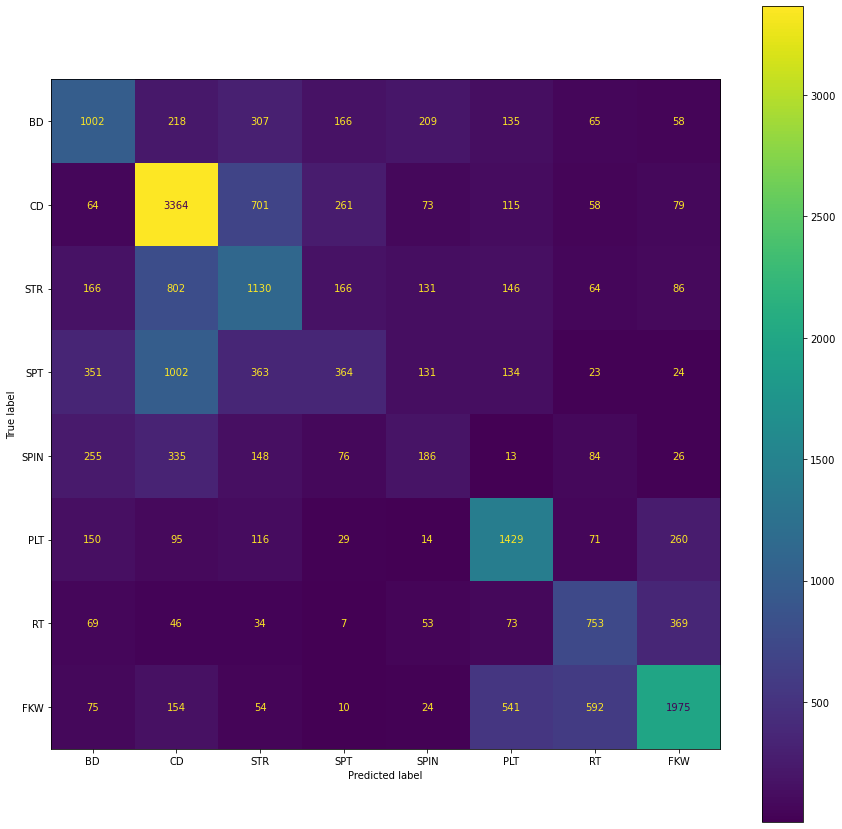

In [15]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


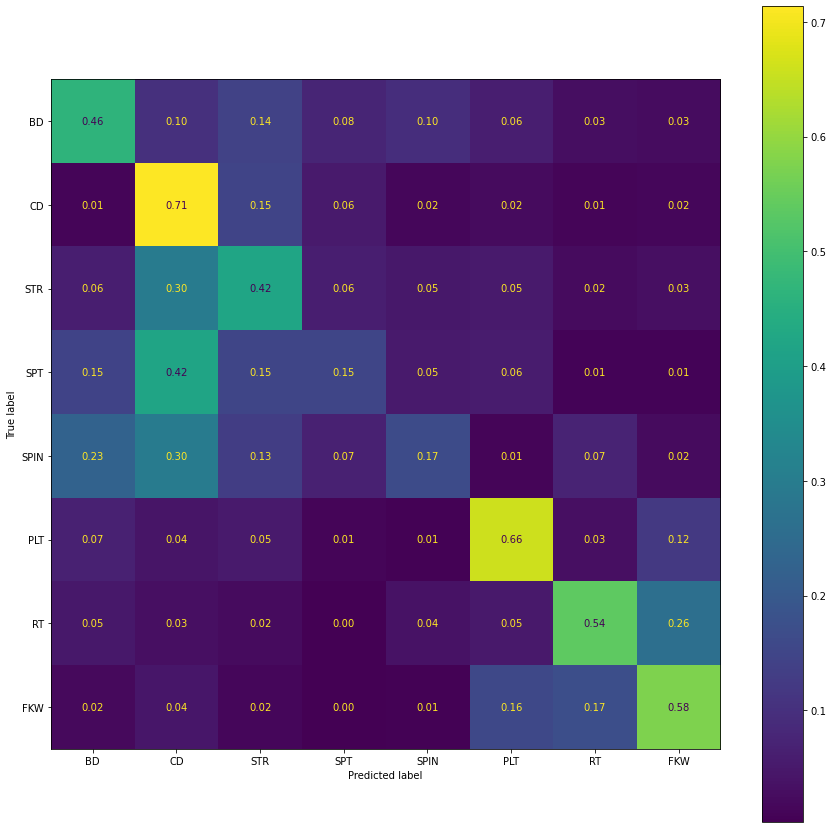

In [16]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)